Tsaqif Rasendrya Wijaksara | 1304221043 / IF-46-02

Reference: https://www.kaggle.com/nidhirastogi/intrusion-detection/data

# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_train = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_test = df_test.drop('Unnamed: 0',axis=1)

# Exploring the data

Data has 42 columns: duration, protocol_type, src_bytes, wrong_fragment, etc.

Training set has 125973 and Test set has 10000 samples

In [2]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


# Save training dataset and test dateaset to each df and split X and Y (xAttack, analysis features).

Using the 41 attributes from both training and testing dataset to classify whether it is an attack(DOS/R2L/Probe/U2R/Normal) [5 labels]

In [4]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [5]:
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r


# Preprocessing and one hot encoding, X is onehotencoder, Y is LabelBinarizer

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [7]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

X OneHotEncoding

In [8]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Y LabelBinarizer

In [9]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


1. Standard deviation

In [10]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


In [11]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


# Linear Regression

In [13]:
from sklearn import linear_model

In [14]:
LR = linear_model.LinearRegression()

In [15]:
LR.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


2. Ensemble feature selection

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [18]:
AB = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='sqrt', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='sqrt', bootstrap=False)
GB = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=200, max_features='sqrt')

In [19]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

In [20]:
AB.fit(X_train, Y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [21]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.767 %


In [22]:
RF.fit(X_train, Y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.759 %


In [24]:
ET.fit(X_train, Y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [25]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.765 %


In [26]:
GB.fit(X_train, Y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [27]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.757 %


In [28]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,0.000061,0.003936,0.001707,0.003885
1,protocol_type,0.000384,0.018684,0.042295,0.036642
2,service,0.462857,0.028154,0.019603,0.005151
3,flag,0.000150,0.040335,0.011495,0.023128
4,src_bytes,0.258486,0.125461,0.027678,0.132364
5,dst_bytes,0.000590,0.133344,0.006244,0.093131
6,land,0.000017,0.000041,0.000024,0.000117
7,wrong_fragment,0.000340,0.007513,0.013262,0.010001


[Text(0, 0, 'duration'),
 Text(1, 0, 'protocol_type'),
 Text(2, 0, 'service'),
 Text(3, 0, 'flag'),
 Text(4, 0, 'src_bytes'),
 Text(5, 0, 'dst_bytes'),
 Text(6, 0, 'land'),
 Text(7, 0, 'wrong_fragment'),
 Text(8, 0, 'urgent'),
 Text(9, 0, 'hot'),
 Text(10, 0, 'num_failed_logins'),
 Text(11, 0, 'logged_in'),
 Text(12, 0, 'num_compromised'),
 Text(13, 0, 'root_shell'),
 Text(14, 0, 'su_attempted'),
 Text(15, 0, 'num_root'),
 Text(16, 0, 'num_file_creations'),
 Text(17, 0, 'num_shells'),
 Text(18, 0, 'num_access_files'),
 Text(19, 0, 'is_host_login'),
 Text(20, 0, 'is_guest_login'),
 Text(21, 0, 'count'),
 Text(22, 0, 'srv_count'),
 Text(23, 0, 'serror_rate'),
 Text(24, 0, 'srv_serror_rate'),
 Text(25, 0, 'rerror_rate'),
 Text(26, 0, 'srv_rerror_rate'),
 Text(27, 0, 'same_srv_rate'),
 Text(28, 0, 'diff_srv_rate'),
 Text(29, 0, 'srv_diff_host_rate'),
 Text(30, 0, 'dst_host_count'),
 Text(31, 0, 'dst_host_srv_count'),
 Text(32, 0, 'dst_host_same_srv_rate'),
 Text(33, 0, 'dst_host_diff_srv_r

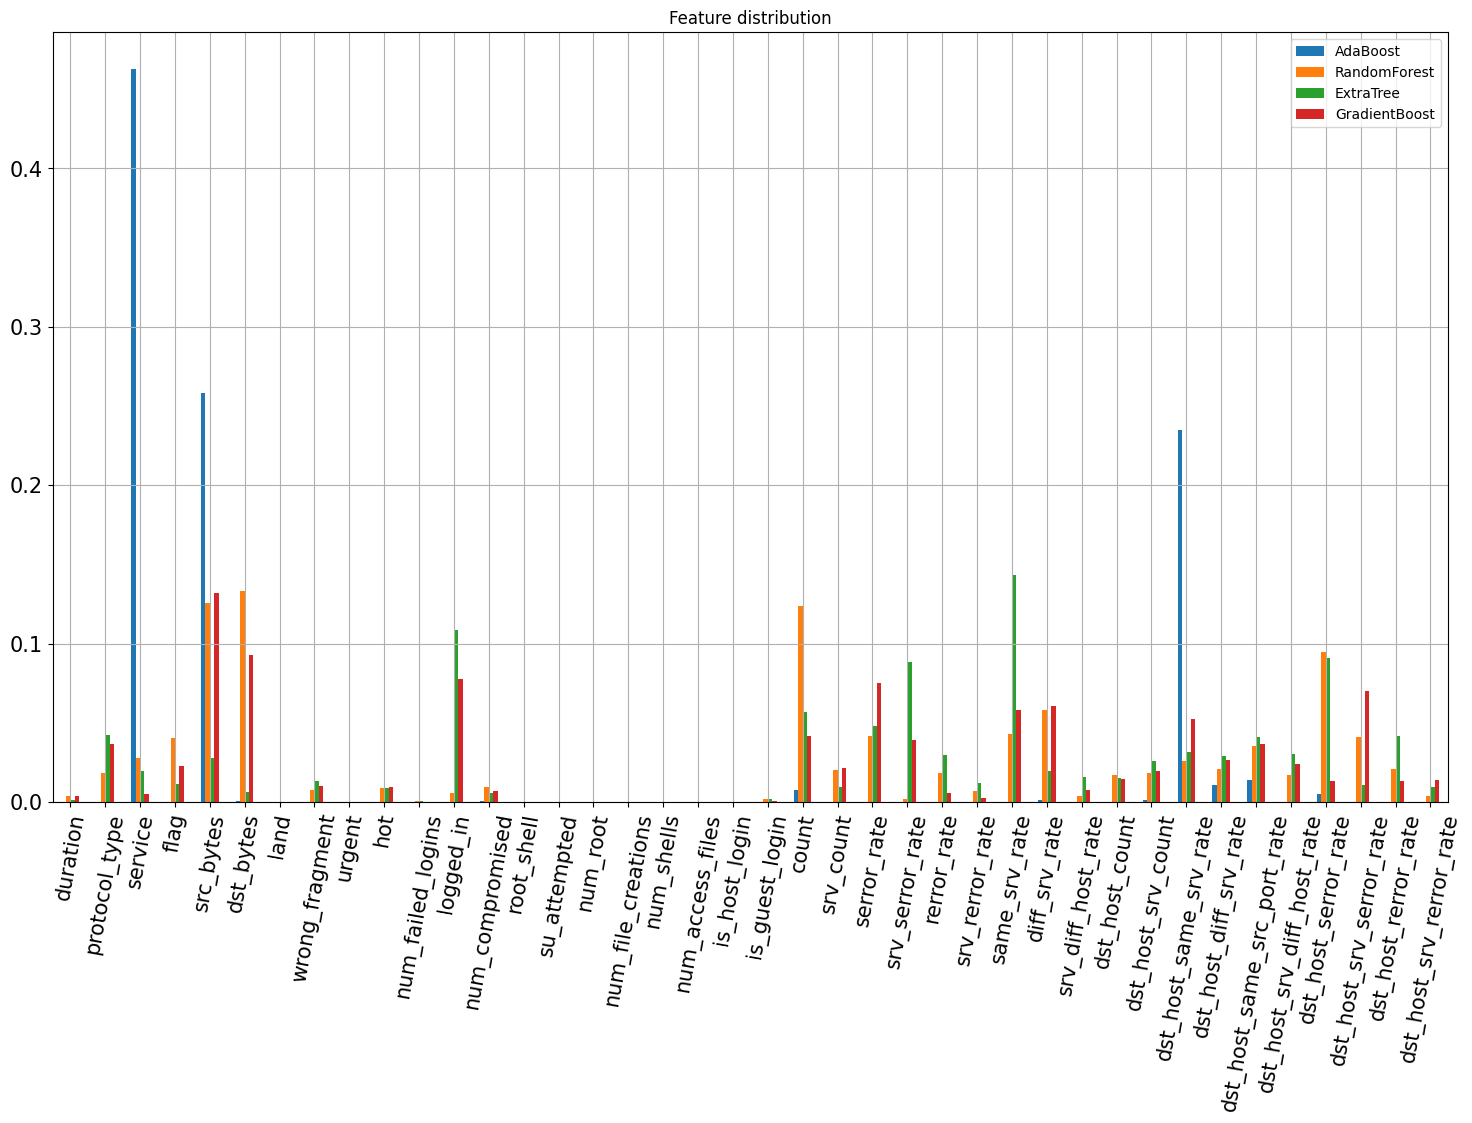

In [29]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15,
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

In [30]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

In [31]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # delete duplicate feature
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
2,service,0.462857,0.028154,0.019603,0.005151
4,src_bytes,0.258486,0.125461,0.027678,0.132364
32,dst_host_same_srv_rate,0.235059,0.025913,0.031601,0.052393
34,dst_host_same_src_port_rate,0.013967,0.035728,0.040925,0.036954
33,dst_host_diff_srv_rate,0.010697,0.021121,0.029354,0.026776
21,count,0.007660,0.123840,0.056929,0.042097
36,dst_host_serror_rate,0.005150,0.094530,0.090736,0.013588
31,dst_host_srv_count,0.001137,0.018318,0.025772,0.019698
28,diff_srv_rate,0.001125,0.058496,0.019416,0.060793
12,num_compromised,0.000785,0.009298,0.006133,0.007005


In [32]:
selected_features = result['features'].values.tolist()
selected_features

['service',
 'src_bytes',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'count',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'diff_srv_rate',
 'num_compromised',
 'dst_bytes',
 'protocol_type',
 'same_srv_rate',
 'logged_in',
 'srv_serror_rate',
 'serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_diff_host_rate',
 'rerror_rate',
 'dst_host_srv_serror_rate',
 'flag']

In [33]:
AB.fit(X_train_stdrop, Y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [34]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.742 %


In [35]:
RF.fit(X_train_stdrop, Y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.766 %


In [37]:
ET.fit(X_train_stdrop, Y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [38]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.760 %


In [39]:
GB.fit(X_train_stdrop, Y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [40]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.77 %


In [41]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,service,src_bytes,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_diff_srv_rate,count,dst_host_serror_rate,dst_host_srv_count,diff_srv_rate,num_compromised,...,protocol_type,same_srv_rate,logged_in,srv_serror_rate,serror_rate,dst_host_rerror_rate,dst_host_srv_diff_host_rate,rerror_rate,dst_host_srv_serror_rate,flag
0,25,0,1.00,0.00,0.00,110,0.65,255,0.0,0,...,0,1.0,0,1.0,1.0,0.32,0.00,0.0,0.65,4
1,25,312,1.00,1.00,0.00,1,0.00,254,0.0,0,...,0,1.0,1,0.0,0.0,0.00,0.06,0.0,0.00,2
2,25,245,1.00,0.01,0.00,5,0.01,255,0.0,0,...,0,1.0,1,0.0,0.0,0.00,0.05,0.0,0.00,2
3,25,298,1.00,0.00,0.00,4,0.00,255,0.0,0,...,0,1.0,1,0.0,0.0,0.00,0.00,0.0,0.00,2
4,20,740,0.18,0.18,0.03,1,0.00,19,0.0,0,...,0,1.0,0,0.0,0.0,0.00,0.00,0.0,0.00,2


3. Correlation

<Axes: >

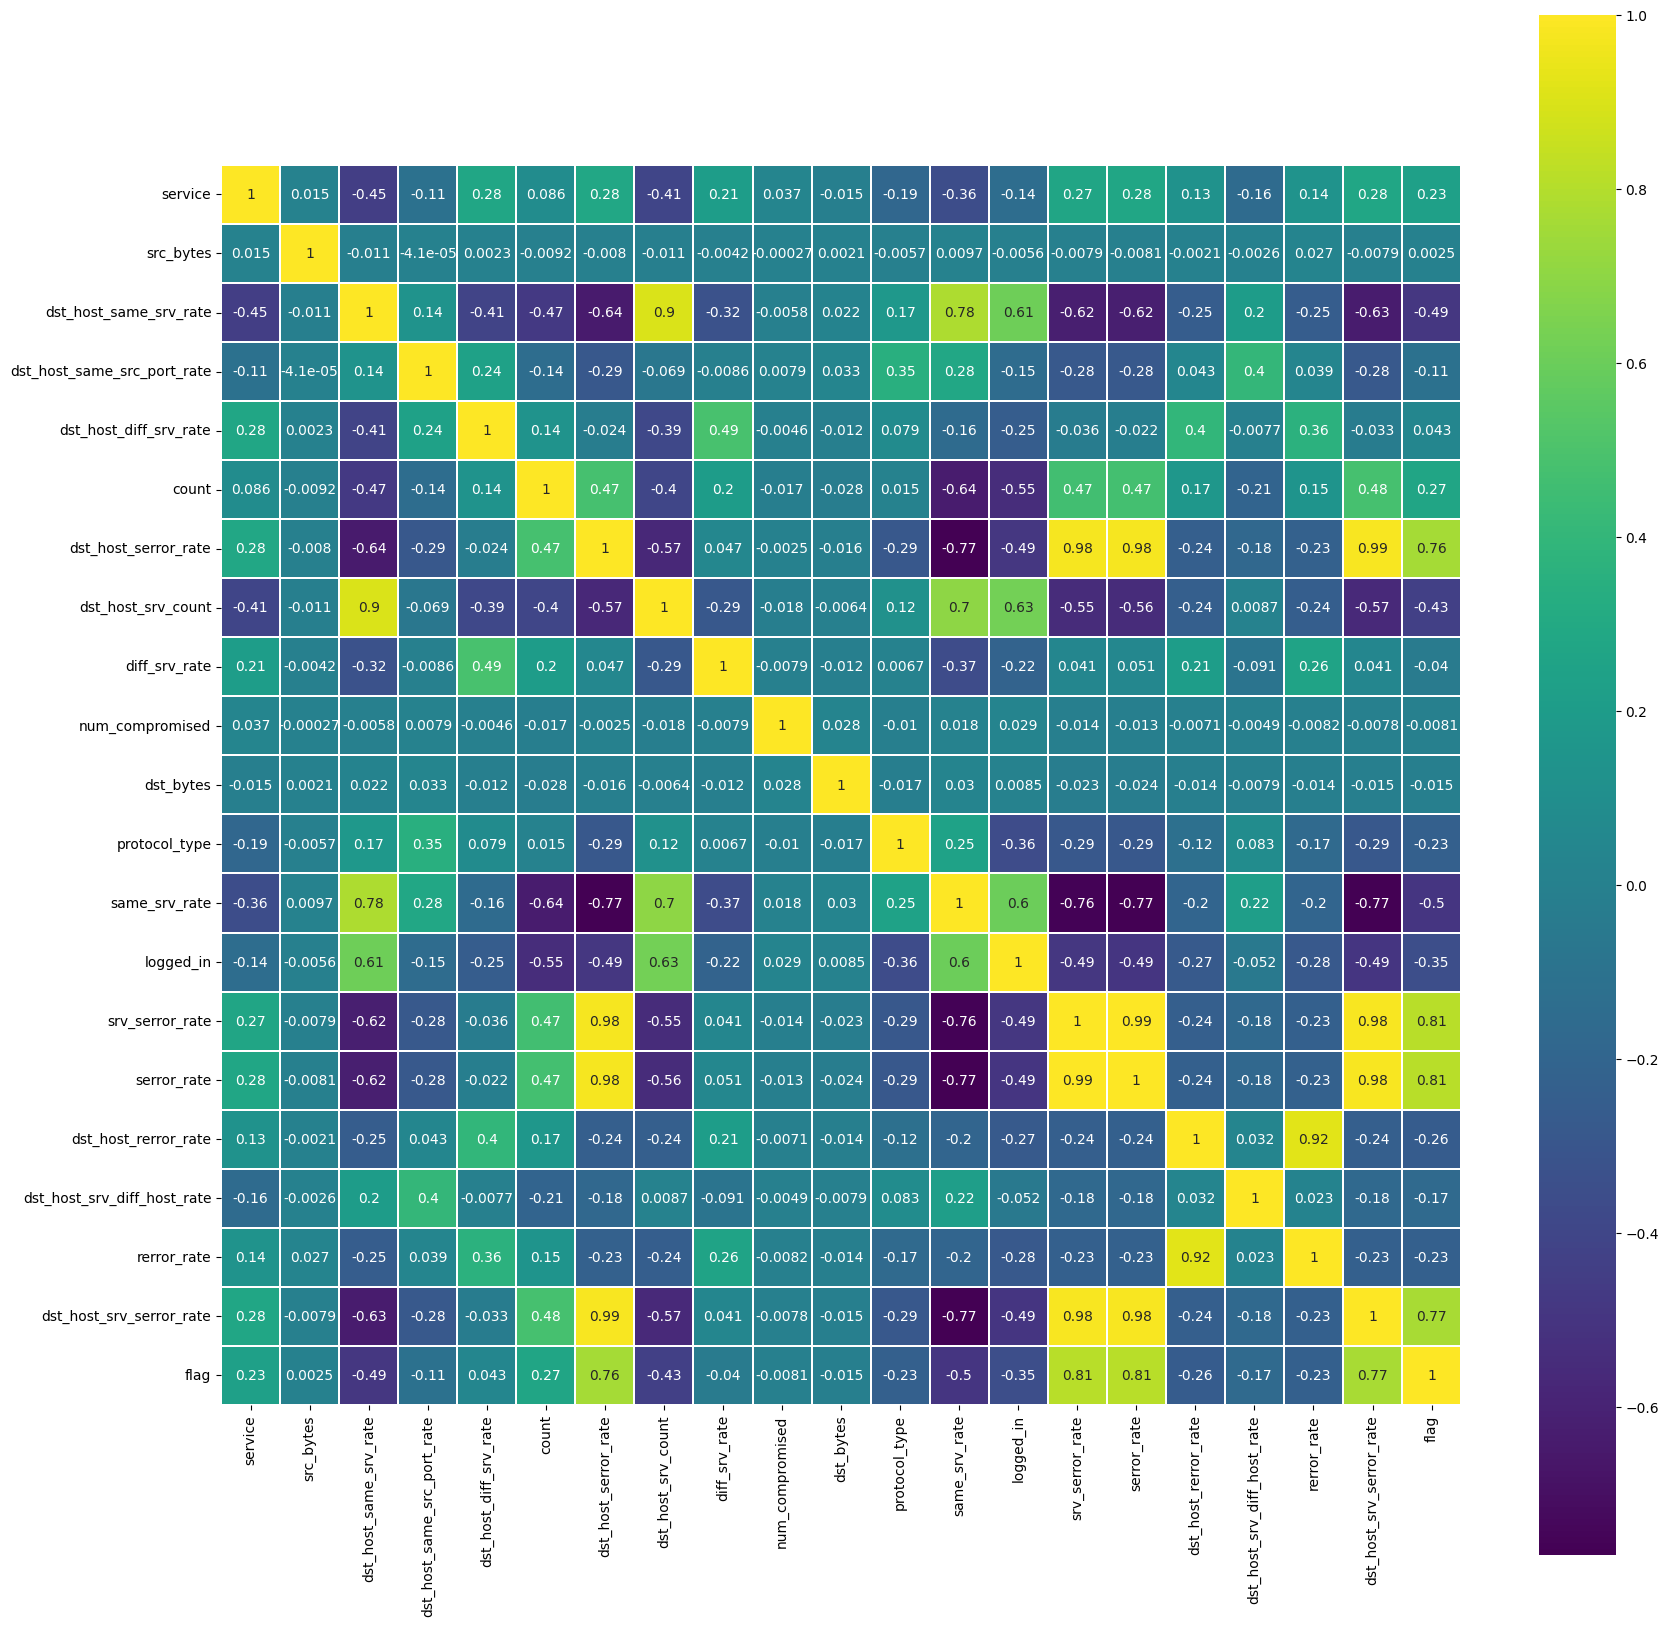

In [42]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [43]:
selected2 = ['flag', 'dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,service,src_bytes,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_diff_srv_rate,count,dst_host_srv_count,diff_srv_rate,num_compromised,dst_bytes,protocol_type,same_srv_rate,logged_in,srv_serror_rate,dst_host_rerror_rate,dst_host_srv_diff_host_rate,rerror_rate,dst_host_srv_serror_rate
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.451700,6.845032e+03,0.605769,0.133167,0.089412,80.152400,139.645700,0.089752,0.020500,1.996999e+03,0.278600,0.739925,0.436600,0.101696,0.236296,0.020102,0.241316,0.097781
std,15.824769,8.675409e+04,0.436278,0.307154,0.218190,129.028094,111.548555,0.252240,0.289289,2.006975e+04,0.657134,0.413711,0.495989,0.295464,0.389137,0.089353,0.418059,0.279651
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000e+00,0.070000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000e+00,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,5.400000e+01,0.910000,0.000000,0.020000,8.000000,159.500000,0.000000,0.000000,4.400000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,2.850000e+02,1.000000,0.030000,0.060000,126.000000,255.000000,0.060000,0.000000,5.990000e+02,0.000000,1.000000,1.000000,0.000000,0.390000,0.010000,0.330000,0.000000
max,70.000000,6.291668e+06,1.000000,1.000000,1.000000,511.000000,255.000000,1.000000,15.000000,1.285078e+06,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2) Modeling

In [44]:
AB.fit(X_train_cordrop, Y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [45]:
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.743 %


In [46]:
RF.fit(X_train_cordrop, Y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.756 %


In [48]:
ET.fit(X_train_cordrop, Y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [49]:
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.767 %


In [50]:
GB.fit(X_train_cordrop, Y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [51]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.762 %


In [52]:
LR.fit(X_train_cordrop, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.251 %


In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [56]:
MLP.fit(X_train_cordrop, Y_train)

,hidden_layer_sizes,"(1000, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,False
,random_state,None


In [57]:
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.471 %


# 3) Result

first models

In [58]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.767300
2,RandomForest,0.758600
3,ExtraTrees,0.765500
4,GradientBoost,0.757400


In [60]:
result_df_sorted = result_df.sort_values(by='accuracy', ascending=False)

[Text(0, 0, 'Adaboost'),
 Text(1, 0, 'ExtraTrees'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'GradientBoost'),
 Text(4, 0, 'Linear Regression')]

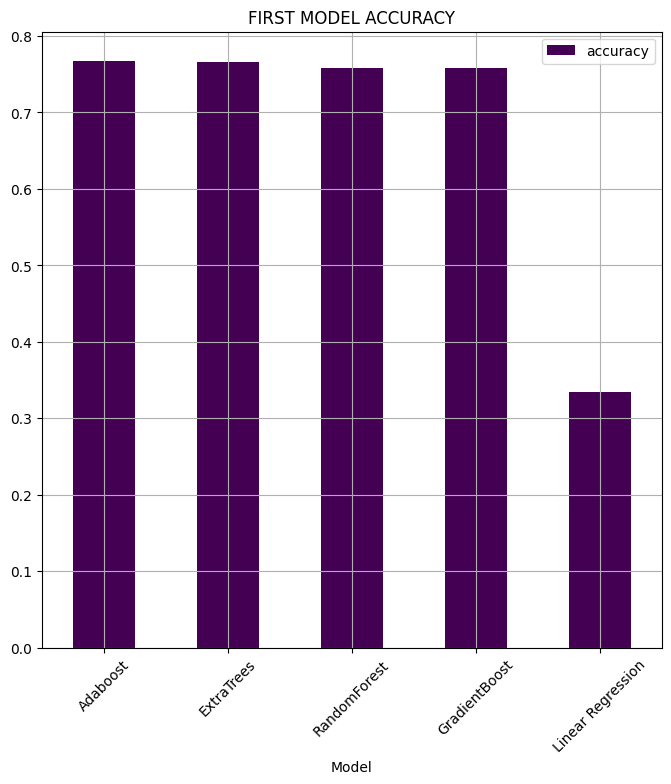

In [61]:
r1 = result_df_sorted.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis)
r1.set_xticklabels(result_df_sorted.Model, rotation=45)

second models

In [62]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7419
1,RandomForest,0.7661
2,ExtraTrees,0.7596
3,GradientBoost,0.7732


In [67]:
result_df_sorted = result_df.sort_values(by='accuracy', ascending=False)

[Text(0, 0, 'ExtraTrees'),
 Text(1, 0, 'GradientBoost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'Adaboost'),
 Text(4, 0, 'MLP'),
 Text(5, 0, 'Linear Regression')]

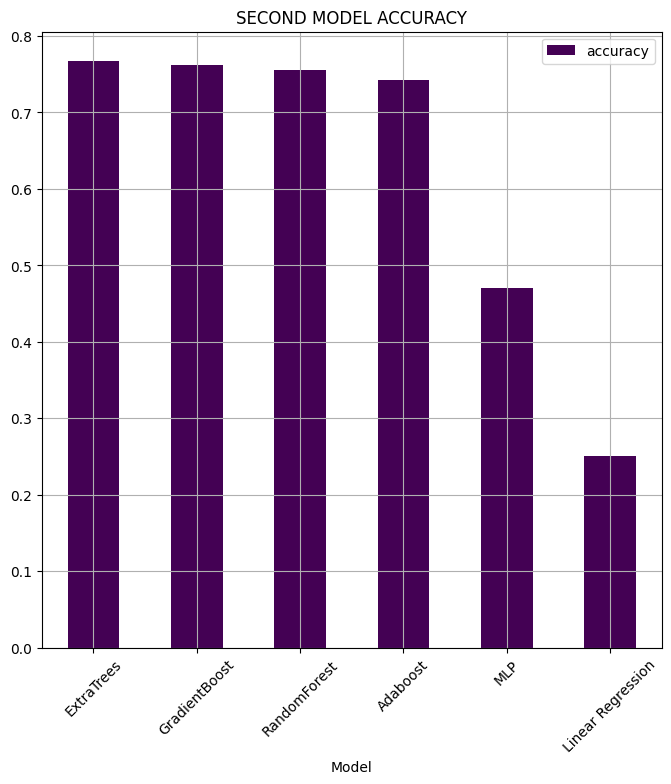

In [68]:
r2 = result_df_sorted.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis)
r2.set_xticklabels(result_df_sorted.Model, rotation=45)

final models

In [65]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.250521
1,Adaboost,0.742900
2,RandomForest,0.756000
3,ExtraTrees,0.767400
4,GradientBoost,0.762200
5,MLP,0.470700


In [69]:
result_df_sorted = result_df.sort_values(by='accuracy', ascending=False)

[Text(0, 0, 'ExtraTrees'),
 Text(1, 0, 'GradientBoost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'Adaboost'),
 Text(4, 0, 'MLP'),
 Text(5, 0, 'Linear Regression')]

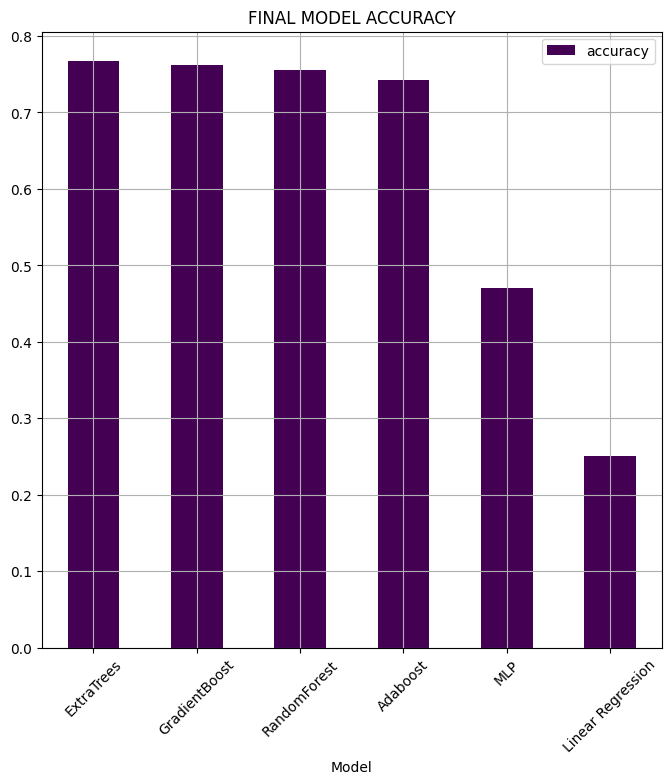

In [70]:
r3 = result_df_sorted.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis)
r3.set_xticklabels(result_df_sorted.Model, rotation = 45)

# FASTEST AND ACCURATE MODEL - ExtraTrees of the final model (76.4%)

# STRONGEST AND THE MOST ACCURATE MODEL - GradientBoost of the final model (77.1%)

Gradient boost has a 77 percent chance, but the speed is significantly faster with ExtraTress.